In [ ]:
pip install nbformat

In [ ]:
pip install plotly

In [ ]:
pip install ipywidgets

In [ ]:
pip install -U kaleido

In [ ]:
pip install imageio

In [ ]:
pip install matplotlib

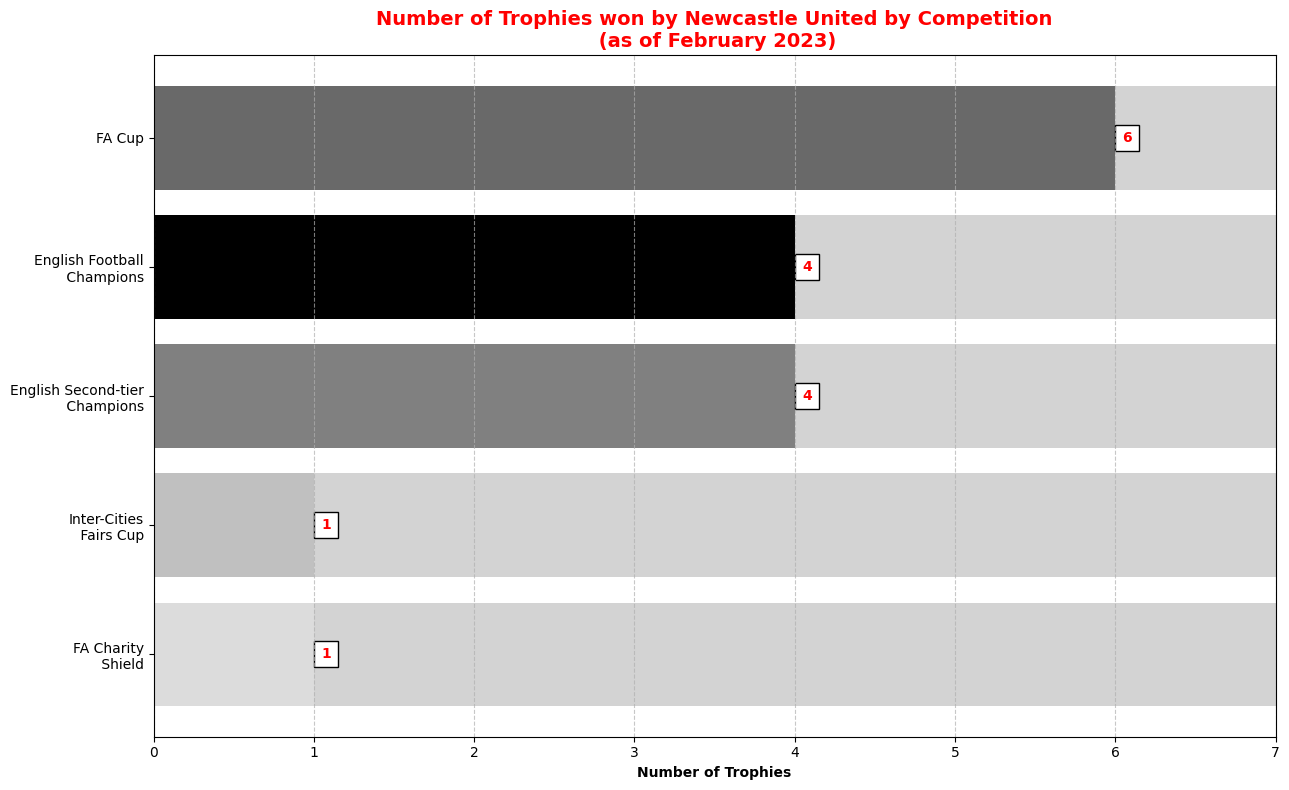

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle

# Data
competitions = ['FA Cup', 'English Football\n Champions', 'English Second-tier\n Champions', 'Inter-Cities\n Fairs Cup', 'FA Charity\n Shield']
trophies = [6, 4, 4, 1, 1]

# Define colors for each trophy
trophy_colors = ['dimgrey', 'black', 'grey', 'silver', 'gainsboro']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(13, 8))

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    loading = []
    for i, trophy in enumerate(trophies):
        loading.append(min(frame - i, trophy))
    ax.barh(competitions, loading, color=trophy_colors)  # Use the same colors for bars
    ax.barh(competitions, np.maximum(0, frame - np.array(trophies)), left=trophies, color='lightgray')
    ax.set_xlim(0, max(trophies) + 1)
    ax.set_xlabel('Number of Trophies', fontweight='bold')  # Make x-axis label bold
    ax.set_title('Number of Trophies won by Newcastle United by Competition\n (as of February 2023)', fontweight='bold', color='red', fontsize=14)
    ax.invert_yaxis()  # Invert y-axis to have the highest value at the top
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Add more rectangular labels next to each bar
    for i, (comp, val) in enumerate(zip(competitions, loading)):
        # Draw more rectangular patch
        ax.add_patch(Rectangle((val, i - 0.10), 0.15, 0.2, color='white', ec='black'))
        # Add text with larger font size for the numbers inside the labels
        ax.text(val + 0.075, i, str(val), va='center', ha='center', fontweight='bold', color='red', fontsize=10)

# Calculate the total number of frames needed
total_frames = sum(trophies)

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(1, total_frames + 1), interval=200, repeat=False)  # Adjust interval for slower movement

# Save the animation as a GIF
ani.save('animated_chart.gif', writer='pillow')

plt.tight_layout()
plt.show()
